### 2022年度プログラミング演習A・B

# 第14回レポート課題の解説

### 演習1

連立一次方程式を解くことによって、関数

$$
f(x)=e^x
$$

の節点

$$
x_0=0,\quad x_1=1
$$

におけるエルミート補間多項式を求め、$-2\leq x\leq 3$ の範囲で元の関数 $f(x)$ とエルミート補間多項式のグラフを描画してください。

なお、連立一次方程式を解く際には演算子`\`を使用し、

$$
f'(x)=e^x
$$

は既知のこととしてよいです。

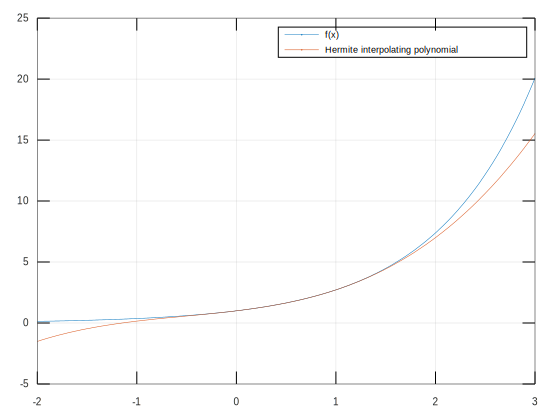

In [1]:
%plot --format svg

function value = f(x)  %関数f(x)
    value = exp(x);
end

function value = f_dif(x)  %関数f(x)の微分
    value = exp(x);
end

x = -2:0.01:3;  %x座標の配列
y = f(x);
plot(x,y,"DisplayName","f(x)")  %f(x)のグラフを描画
grid on
hold on

x0 = 0;  %節点
x1 = 1;

A = [1,x0,x0^2,x0^3; 1,x1,x1^2,x1^3; 0,1,2*x0,3*x0^2; 0,1,2*x1,3*x1^2];
b = [f(x0); f(x1); f_dif(x0); f_dif(x1)];
c = A\b;  %連立一次方程式Ac=bを解いて係数ベクトルcを求める

y = c(1)+c(2)*x+c(3)*x.^2+c(4)*x.^3;  %エルミート補間多項式を計算
plot(x,y,"DisplayName","Hermite interpolating polynomial")  %エルミート補間多項式のグラフを描画

legend  %凡例の表示

### （別解）

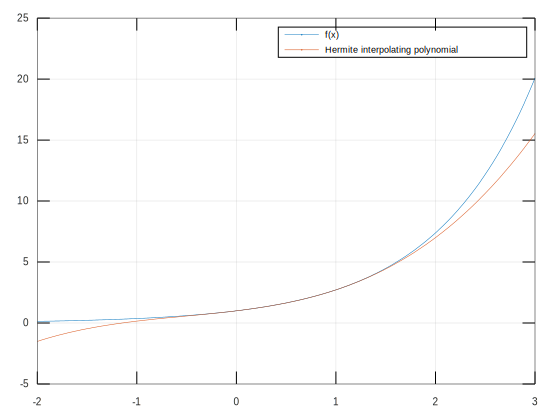

In [2]:
%plot --format svg

function value = f(x)  %関数f(x)
    value = exp(x);
end

function value = f_dif(x)  %関数f(x)の微分
    value = exp(x);
end

x = -2:0.01:3;  %x座標の配列
y = f(x);
plot(x,y,"DisplayName","f(x)")  %f(x)のグラフを描画
grid on
hold on

node = [0;1];  %節点の配列（縦ベクトル）
n = length(node)-1;  %nodeの要素数が変わっても対応できるように、以下ではnを使う

A = zeros(2*n+2);
for j = 0:2*n+1
    A(1:n+1,j+1) = node.^j;  %行列Aの上半分を列ごとに計算
end
for j = 1:2*n+1
    A(n+2:2*n+2,j+1) = j*node.^(j-1);  %行列Aの下半分を列ごとに計算
end
b = [f(node);f_dif(node)];
c = A\b;  %連立一次方程式Ac=bを解いて係数ベクトルcを求める

y = 0;
for j = 0:2*n+1
    y = y+c(j+1)*x.^j;  %エルミート補間多項式を計算
end
plot(x,y,"DisplayName","Hermite interpolating polynomial")  %エルミート補間多項式のグラフを描画

legend  %凡例の表示

### 演習2

エルミート基底多項式を用いることによって、関数

$$
f(x)=e^x
$$

の節点

$$
x_0=0,\quad x_1=1
$$

におけるエルミート補間多項式を求め、$-2\leq x\leq 3$ の範囲で元の関数 $f(x)$ とエルミート補間多項式のグラフを描画してください。

なお、

$$
f'(x)=e^x
$$

は既知のこととしてよいです。

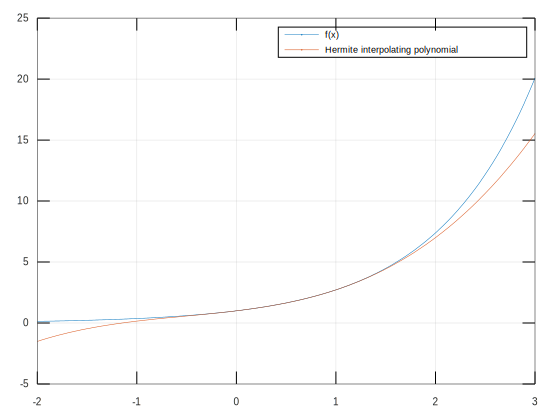

In [3]:
%plot --format svg

function value = f(x)  %関数f(x)
    value = exp(x);
end

function value = f_dif(x)  %関数f(x)の微分
    value = exp(x);
end

x = -2:0.01:3;  %x座標の配列
y = f(x);
plot(x,y,"DisplayName","f(x)")  %f(x)のグラフを描画
grid on
hold on

x0 = 0;  %節点
x1 = 1;

H0 = (1-2*(x-x0)/(x0-x1)).*((x-x1)/(x0-x1)).^2;  %エルミート基底多項式を計算
H1 = (1-2*(x-x1)/(x1-x0)).*((x-x0)/(x1-x0)).^2;
K0 = (x-x0).*((x-x1)/(x0-x1)).^2;
K1 = (x-x1).*((x-x0)/(x1-x0)).^2;

y = f(x0)*H0+f(x1)*H1+f_dif(x0)*K0+f_dif(x1)*K1;  %エルミート補間多項式を計算
plot(x,y,"DisplayName","Hermite interpolating polynomial")  %エルミート補間多項式のグラフを描画

legend  %凡例の表示

### （別解）

ラグランジュ基底多項式

$$
L_j(x)=\prod_{k=0\\ k\neq j}^n\frac{x-x_k}{x_j-x_k}\quad (j=0,\ldots,n)
$$

の微分が

$$
L_j'(x)=L_j(x)\sum_{k=0\\ k\neq j}^n\frac{1}{x-x_k}\quad (j=0,\ldots,n)
$$

と表されること（対数微分により導出可能）を用いれば、エルミート基底多項式

$$
H_j(x)=\left(1-2L_j'(x_j)(x-x_j)\right)\left(L_j(x)\right)^2\quad (j=0,\ldots,n),
$$

$$
K_j(x)=(x-x_j)\left(L_j(x)\right)^2\quad (j=0,\ldots,n)
$$

を一般の場合にも計算できる。

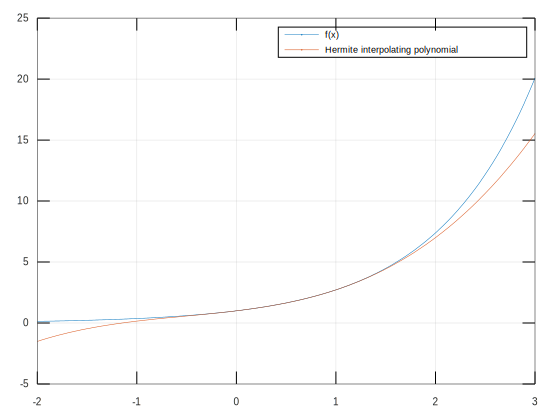

In [4]:
%plot --format svg

function value = f(x)  %関数f(x)
    value = exp(x);
end

function value = f_dif(x)  %関数f(x)の微分
    value = exp(x);
end

function value = Lagrange(node,j,x)  %ラグランジュ基底多項式
    n = length(node)-1;
    numerator = 1;
    denominator = 1;
    for k = [0:j-1,j+1:n]
        numerator = numerator.*(x-node(k+1));
        denominator = denominator*(node(j+1)-node(k+1));
    end
    value = numerator/denominator;
end

function value = Lagrange_dif(node,j,x)  %ラグランジュ基底多項式の微分
    n = length(node)-1;
    tmp = 0;
    for k = [0:j-1,j+1:n]
        tmp = tmp+1./(x-node(k+1));
    end
    value = tmp.*Lagrange(node,j,x);
end

function value = H(node,j,x)  %エルミート基底多項式1
    value = (1-2*Lagrange_dif(node,j,node(j+1))*(x-node(j+1))).*Lagrange(node,j,x).^2;
end

function value = K(node,j,x)  %エルミート基底多項式2
    value = (x-node(j+1)).*Lagrange(node,j,x).^2;
end

x = -2:0.01:3;  %x座標の配列
y = f(x);
plot(x,y,"DisplayName","f(x)")  %f(x)のグラフを描画
grid on
hold on

node = [0,1];  %節点の配列
n = length(node)-1;

y = 0;
for j = 0:n
    y = y+f(node(j+1))*H(node,j,x);  %エルミート補間多項式を計算
    y = y+f_dif(node(j+1))*K(node,j,x);
end
plot(x,y,"DisplayName","Hermite interpolating polynomial")  %エルミート補間多項式のグラフを描画

legend  %凡例の表示

### 演習3（オプション）

$n$ を自然数とし、関数

$$
f(x)=\sin\left(2\pi x^2\right)
$$

と節点

$$
x_i=\frac{i}{2n}\quad (i=0,\ldots,2n)
$$

に対して三角関数による補間を考えます。

$n=1,2,3$ の各場合に補間関数を求め、$0\leq x\leq 1$ の範囲で元の関数 $f(x)$ と $3$ 個の補間関数のグラフを描画してください。

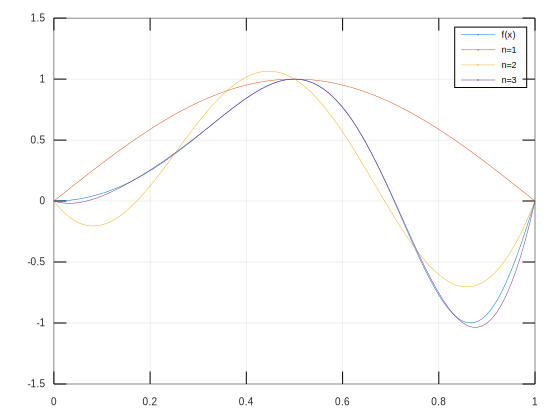

In [5]:
%plot --format svg

function value = f(x)  %関数f(x)
    value = sin(2*pi*x.^2);
end

x = 0:0.01:1;  %x座標の配列
y = f(x);
plot(x,y,"DisplayName","f(x)")  %f(x)のグラフを描画
grid on
hold on

for n = [1,2,3]  %for文でnを変化させる
    node = (0:1/(2*n):1)';  %節点の配列（縦ベクトル）
    
    A = zeros(2*n+1);
    A(:,1) = 1;
    for j = 1:n
        A(:,j+1) = sin(j*pi*node);  %行列Aの各列を計算
        A(:,n+j+1) = cos(j*pi*node);
    end
    b = f(node);
    c = A\b;  %連立一次方程式Ac=bを解いて係数ベクトルcを求める
    
    y = c(1);
    for j = 1:n
        y = y+c(j+1)*sin(j*pi*x);  %補間関数を計算
        y = y+c(n+j+1)*cos(j*pi*x);
    end
    plot(x,y,"DisplayName",["n=",num2str(n)])  %補間関数のグラフを描画
end

legend  %凡例の表示